# Coding bootstrapping yourself

In this activity, you will look for the difference between K-fold and other cross-validated sampling:

## The dataset

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

np.random.seed(10)

data = datasets.load_wine()
X = data['data']
y = data['target']

## Print the info if needed
#print(data['DESCR'])

## Creating a shuffled cross validation

Create a function that either uses K-Fold, or shuffled cross-validation (use a test-size of 30% with the shuffled variant and set the random state to 10!):

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',multi_class='auto')    
    
def apply_cv(X, y, nFold, test_size, shuffled):   
    # Your output should be a cross_validate() object
    from sklearn.pipeline import make_pipeline
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import ShuffleSplit, KFold
    
    # Make a pipeline with the classifier
    pipeline = make_pipeline(classifier)

    # Add the accuracy as the metric
    metrics = ['accuracy']
    
    # Set up a validation scheme according to the parameter
    if shuffled:
        cv = ShuffleSplit(n_splits = nFold, test_size=0.3, random_state=10)
    else:
        cv = KFold(n_splits= nFold)
    
    # Add the scheme, metrics, and pipeline to the cross validation
    outcomes = cross_validate(pipeline, X, y, scoring=metrics, cv= cv, return_train_score=False)    
    ### END SOLUTION
    
    return outcomes['test_accuracy']

Validate your results:

In [5]:
assert np.allclose(apply_cv(X, y, 10, 0.3, True),[0.87037037, 0.96296296, 0.98148148, 0.96296296, 0.88888889,
       0.96296296, 0.94444444, 0.90740741, 0.87037037, 0.94444444])
assert np.allclose(apply_cv(X, y, 10, 0.3, False),[0.94444444, 0.88888889, 1.        , 0.83333333, 0.88888889,
       1.        , 1.        , 0.88888889, 1.        , 1.        ])


###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Visualisation

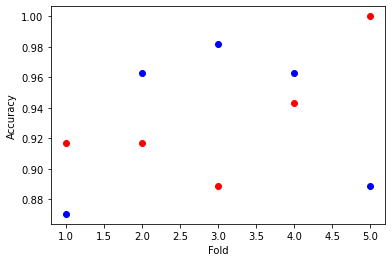

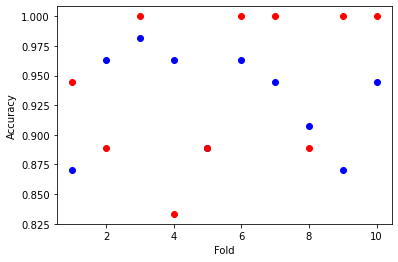

In [6]:
for n_fold in [5,10]:
    plt.scatter(range(1,n_fold+1),apply_cv(X, y, n_fold, 0.3, True),color='blue')
    plt.scatter(range(1,n_fold+1),apply_cv(X, y, n_fold, 0.3, False),color='red')
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.show()

What can you learn by looking at these graphs? You will be discussing this in the next activity with your peers.